## <font color="red"> ESERCIZIO 11
    
*Nota*: in questo esercizio e nel prossimo non ho scritto nessun codice in C++. Nelle cartelle ci sono delle immagini che riportano alcuni risultati, in modo da non rendere troppo lungo il notebook. Sottolineo che i codici utilizzati per la risoluzione sono copiati e adattati dal testo.

### <font color="blue"> Parte 01

Provo per prima cosa a modificare i parametri suggeriti in modo da capire come varia il risultato nel caso della regressione lineare.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Per prima cosa osservo come variano i dati di validazione all'aumentare del rumore: mi aspetto una deviazione dal comportamento ideale. Vengono riportati alcuni casi nelle prossime figure.

In [3]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

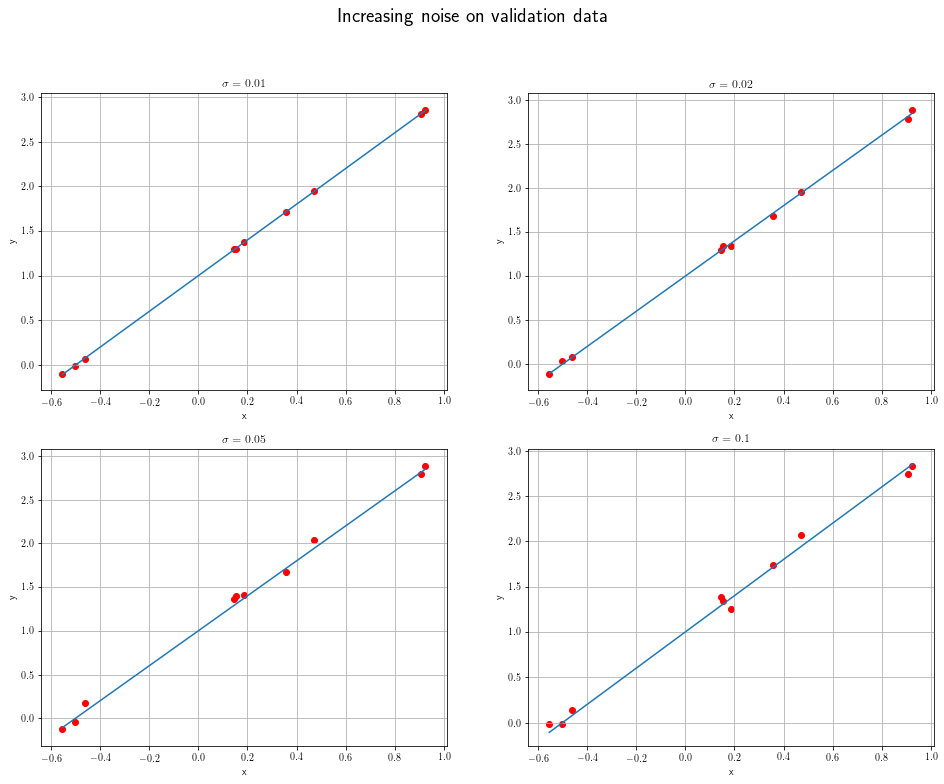

In [4]:
# plot training and target dataset
plt.rc('text', usetex=True)

plt.figure(figsize=(16,12))
plt.suptitle('Increasing noise on validation data',fontsize=20)

plt.subplot(221)
plt.title('$\sigma = 0.01$')
sigma = 0.01
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(222)
plt.title('$\sigma = 0.02$')
sigma = 0.02
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(223)
plt.title('$\sigma = 0.05$')
sigma = 0.05
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(224)
plt.title('$\sigma = 0.1$')
sigma = 0.1
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Alleno il modello creato utilizzando le coppie $(x,y_{train})$ da cui l'*optimizer* troverà i migliori pesi per minimizzare la funzione *MSE*. Faccio un po' di tentativi al variare dei parametri $\sigma$, $N_{epoch}$ e $N_{train}$. I risultati proposti sono ottenuti utilizzando i seguenti parametri:

In [5]:
sigma = 0.03 # noise standard deviation
ep = 70
n_tr = 9000
n_val = 1000

x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [7]:
# compose the NN model
test = tf.keras.Sequential()
test.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
test.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [8]:
# get a summary of our composed model
test.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit the model using training dataset
# over n epochs of N batch size each
# report training progress against validation data
history = test.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=ep,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 100 samples, validate on 10 samples
Epoch 1/70
100/100 [==============================] - 1s 5ms/sample - loss: 1.7784 - mean_squared_error: 1.7784 - val_loss: 1.4562 - val_mean_squared_error: 1.4562
Epoch 2/70
100/100 [==============================] - 0s 84us/sample - loss: 1.6265 - mean_squared_error: 1.6265 - val_loss: 1.3460 - val_mean_squared_error: 1.3460
Epoch 3/70
100/100 [==============================] - 0s 107us/sample - loss: 1.4932 - mean_squared_error: 1.4932 - val_loss: 1.2186 - val_mean_squared_error: 1.2186
Epoch 4/70
100/100 [==============================] - 0s 109us/sample - loss: 1.3414 - mean_squared_error: 1.3414 - val_loss: 1.1106 - val_mean_squared_error: 1.1106
Epoch 5/70
100/100 [==============================] - 0s 155us/sample - loss: 1.2141 - mean_squared_error: 1.2141 - val_loss: 1.0244 - val_mean_squared_error: 1.0244
Epoch 6/70
100/100 [==============================] - 0s 94us/sample - loss: 1.1108 - mean_squared_error: 1.1108 - val_loss: 0.9

Epoch 50/70
100/100 [==============================] - 0s 122us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0784 - val_mean_squared_error: 0.0784
Epoch 51/70
100/100 [==============================] - 0s 114us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0750 - val_mean_squared_error: 0.0750
Epoch 52/70
100/100 [==============================] - 0s 101us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0714 - val_mean_squared_error: 0.0714
Epoch 53/70
100/100 [==============================] - 0s 97us/sample - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.0676 - val_mean_squared_error: 0.0676
Epoch 54/70
100/100 [==============================] - 0s 87us/sample - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.0637 - val_mean_squared_error: 0.0637
Epoch 55/70
100/100 [==============================] - 0s 83us/sample - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.0604 - val_mean_squared_error: 0.0604
E

In [10]:
# evaluate model
print('MODEL TEST:')
score = test.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print()

# evaluate model with the exact curve
print('MODEL TEST WITH THE EXACT CURVE:')
score = test.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

MODEL TEST:
10/10 [==============================] - 0s 139us/sample - loss: 0.0287 - mean_squared_error: 0.0287

Test loss: 0.028697405010461807
Test accuracy: 0.028697405


MODEL TEST WITH THE EXACT CURVE:
10/10 [==============================] - 0s 85us/sample - loss: 0.0287 - mean_squared_error: 0.0287

Test loss: 0.028697405010461807
Test accuracy: 0.028697405


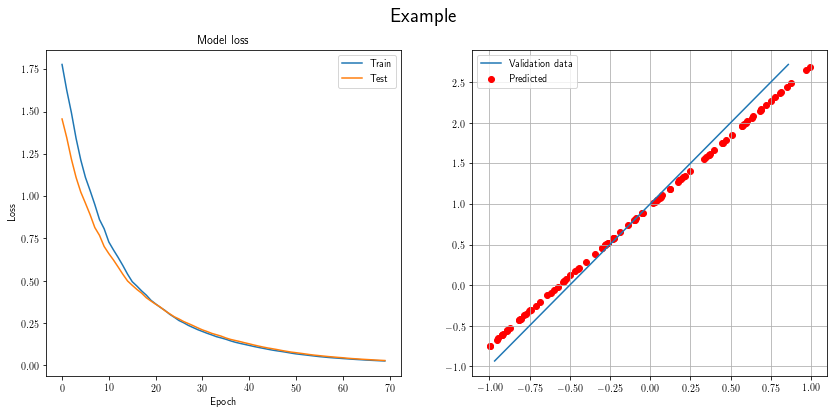

In [11]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(14,6))
plt.suptitle('Example',fontsize=20)

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = test.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')
plt.plot(x_valid, y_target, label='Validation data')
plt.grid(True)
plt.legend()

plt.show()

Osservo che nei vari tentativi, fissato il rumore, se si aumentano $N_{epoch}$ e $N_{train}$ i risultati migliorano. Aumentando il rumore è necessario incrementare notevolmente gli altri parametri affinché si abbia una buona predizione da parte della NN: naturalmente bisogna prestare attenzione a non incorrere nell'overfitting.

### <font color="blue"> Parte 02

Ripeto tutto con il polinomio fornito; utilizzo un numero abbastanza elevato per i punti di train e validation. Ho deciso di mettere a zero il rumore dei dati per semplicità.

In [12]:
# Number of train and validation points
N_tr = 9000
N_val = 1000

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_tr)
x_valid = np.random.uniform(-1, 1, N_val)
x_valid.sort()

y_target = 4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3 # ideal (target) polinomial

sigma = 0.0 # put to zero the noise
y_train = np.random.normal(4. - 3.*x_train - 2.*x_train**2 + 3.*x_train**3, sigma)
y_valid = np.random.normal(4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3, sigma)

Scelgo un neurone in input e uno in output dato che la funzione da fittare è a una variabile e a valori reali. Inserisco poi una serie di *hidden layers* per riprodurre i picchi della funzione.

Per prima cosa parto dai dati usati nella parte precedente, fissando come funzione di attivazione *sigmoid* e variando il numero di *hidden layers* e di neuroni, in modo da avere un'idea di come si comporta l'algoritmo. Riporto ora alcune immagini dei risultati, realizzate con il codice delle prossime celle (le varie funzioni provate le ho prese dal sito di riferimento di *Keras*)

#### Primo tentativo: 1 *hidden layer* da 20 neuroni
<img src="First.png">

Noto una minima somiglianza con la forma curva ma non coincidono assolutamente: aumentando il numero di neuroni il risultato non cambia molto e dunque decido di utilizzare un altro *hidden layer*.

#### Secondo tentativo: 2 *hidden layers* da 30 neuroni
<img src="Second.png">

Si vede un peggioramento del risultato e anche aumentando il numero di neuroni la qualità del fit non migliora. Provo allora a cambiare le funzioni di attivazione.

#### Terzo tentativo: funzione di attivazione *elu* per entrambi gli *hidden layers*
<img src="Third.png">

Osservo un sensibile miglioramento nella regione $x<0.5$ mentre la coda sulla destra non è molto ben fittata. Di nuovo, anche se si aumenta il numero di neuroni il risultato non cambia molto. Anche provando a mescolare le varie funzioni di attivazione non si hanno sensibili miglioramenti. Per questo decido di mantenere come funzioni di attivazione *elu* e provo a modificare la funzione di ottimizzazione.

#### Quarto tentativo: funzione di ottimizzazione *Adam*
<img src="Fourth.png">

Scegliendo questa funzione di ottimizzazione il risultato migliora notevolmente, infatti i punti fittano bene anche la coda. Provo dunque a modificare anche la funzione di *loss* per vedere se cambia qualcosa.

#### Quinto tentativo: *loss function mae*
<img src="Fifth.png">

Dato che il fit avviene per una funzione continua, provo ad utilizzare come loss function *mae* (mean absolute error): tuttavia si vede che quella usata finora, la *mse* (mean squared error) funziona meglio.

Dunque nelle prossime celle viene riportato il codice utilizzato per realizzare la figura del punto 4 che pare essere la migliore tra tutte.

In [13]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.add(Dense(20, Activation('elu')))
model.add(Dense(30, Activation('elu')))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s 60us/sample - loss: 2.3722 - mean_squared_error: 2.3722 - val_loss: 0.5492 - val_mean_squared_error: 0.5492
Epoch 2/50
9000/9000 [==============================] - 0s 36us/sample - loss: 0.5490 - mean_squared_error: 0.5490 - val_loss: 0.5359 - val_mean_squared_error: 0.5359
Epoch 3/50
9000/9000 [==============================] - 0s 38us/sample - loss: 0.5372 - mean_squared_error: 0.5372 - val_loss: 0.5262 - val_mean_squared_error: 0.5262
Epoch 4/50
9000/9000 [==============================] - 0s 42us/sample - loss: 0.4934 - mean_squared_error: 0.4934 - val_loss: 0.4356 - val_mean_squared_error: 0.4356
Epoch 5/50
9000/9000 [==============================] - 0s 44us/sample - loss: 0.3145 - mean_squared_error: 0.3145 - val_loss: 0.1725 - val_mean_squared_error: 0.1725
Epoch 6/50
9000/9000 [==============================] - 0s 38us/sample - loss: 0.1224 - mean_squared_error: 0.1224 - 

9000/9000 [==============================] - 0s 40us/sample - loss: 8.6082e-04 - mean_squared_error: 8.6082e-04 - val_loss: 8.1830e-04 - val_mean_squared_error: 8.1830e-04
Epoch 50/50
9000/9000 [==============================] - 0s 36us/sample - loss: 8.6962e-04 - mean_squared_error: 8.6962e-04 - val_loss: 8.5823e-04 - val_mean_squared_error: 8.5823e-04


In [15]:
# evaluate model
print('MODEL TEST:')
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print()

# evaluate model with the exact curve
print('MODEL TEST WITH THE EXACT CURVE:')
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

MODEL TEST:
1000/1000 [==============================] - 0s 26us/sample - loss: 8.5823e-04 - mean_squared_error: 8.5823e-04

Test loss: 0.0008582254751236178
Test accuracy: 0.00085822545


MODEL TEST WITH THE EXACT CURVE:
1000/1000 [==============================] - 0s 17us/sample - loss: 8.5823e-04 - mean_squared_error: 8.5823e-04

Test loss: 0.0008582254751236178
Test accuracy: 0.00085822545


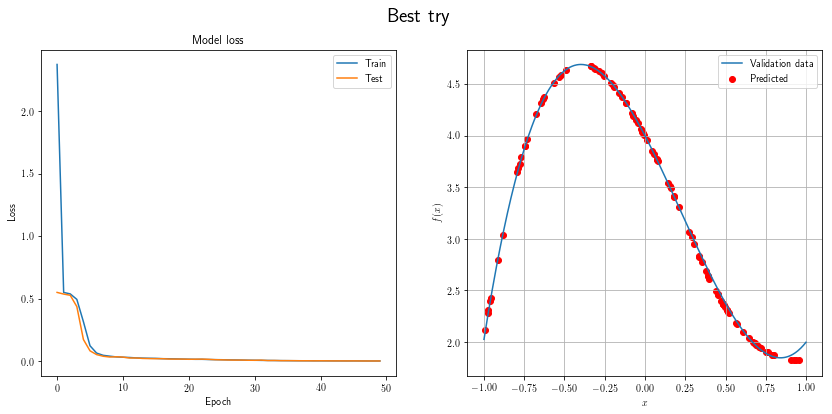

In [16]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(14,6))
plt.suptitle('Best try',fontsize=20)

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')
plt.plot(x_valid, y_target, label='Validation data')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()

plt.show()

Con questa scelta dei parametri, provo a vedere come va il fit al di fuori dell'intervallo di training.

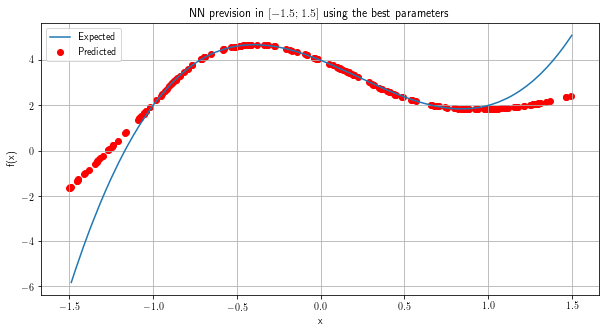

In [17]:
plt.figure(figsize=(10,5))
plt.title('NN prevision in $[-1.5;1.5]$ using the best parameters')

# Plot the polinomial in [-1.5, 1.5]
x_valid = np.random.uniform(-1.5, 1.5, 200)
x_valid.sort()
y_target = 4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3

plt.plot(x_valid, y_target, label='Expected')

# Plot the prevision
x_predicted = np.random.uniform(-1.5, 1.5, 200)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.show()

Noto che nel range di training il fit è ottimo mentre basta allontanarsi pochissimo dai bordi affinché l'abilità predittiva della NN svanisca.

### <font color="blue"> Parte 03

Per risolvere quest'ultima parte prendo come punto di partenza i parametri utilizzati nel punto precedente e vedo come si comporta la NN; successivamente modifico i parametri come fatto prima per trovare la miglior configurazione. Di nuovo metto a zero il rumore per semplicità.

In [18]:
# Function (takes a vector gives a scalar)
def Sin(x):
    return np.sin( x[:,0]**2 + x[:,1]**2 )

In [19]:
# Number of train and validation points
#N_tr = 45000
#N_val = 5000

# Define some vectors
x_train = np.zeros((9000, 2))
x_valid = np.zeros((1000, 2))

# generate training inputs
np.random.seed(0)
x_train[:,0] = np.random.uniform(-1.5, 1.5, 9000)
x_train[:,1] = np.random.uniform(-1.5, 1.5, 9000)

x_valid[:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, 1000)

x_valid[0].sort()
x_valid[0].sort()

y_target = Sin(x_valid)

sigma = 0.0 # put to zero the noise
y_train = np.random.normal(Sin(x_train), sigma)
y_valid = np.random.normal(Sin(x_valid), sigma)

Rispetto a prima modifico il primo layer includendo due neuroni dato che ho due variabili in input.

In [20]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Dense(40, Activation('sigmoid')))
model.add(Dense(50, Activation('elu')))
model.add(Dense(20, Activation('elu')))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2050      
_________________________________________________________________
dense_9 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [21]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s 59us/sample - loss: 0.1585 - mean_squared_error: 0.1585 - val_loss: 0.1668 - val_mean_squared_error: 0.1668
Epoch 2/50
9000/9000 [==============================] - 0s 41us/sample - loss: 0.1566 - mean_squared_error: 0.1566 - val_loss: 0.1616 - val_mean_squared_error: 0.1616
Epoch 3/50
9000/9000 [==============================] - 0s 41us/sample - loss: 0.1542 - mean_squared_error: 0.1542 - val_loss: 0.1613 - val_mean_squared_error: 0.1613
Epoch 4/50
9000/9000 [==============================] - 0s 41us/sample - loss: 0.1553 - mean_squared_error: 0.1553 - val_loss: 0.1628 - val_mean_squared_error: 0.1628
Epoch 5/50
9000/9000 [==============================] - 0s 41us/sample - loss: 0.1539 - mean_squared_error: 0.1539 - val_loss: 0.1601 - val_mean_squared_error: 0.1601
Epoch 6/50
9000/9000 [==============================] - 0s 41us/sample - loss: 0.1539 - mean_squared_error: 0.1539 - 

9000/9000 [==============================] - 0s 35us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 50/50
9000/9000 [==============================] - 0s 35us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.0771 - val_mean_squared_error: 0.0771


In [22]:
# evaluate model
print('MODEL TEST:')
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print()

# evaluate model with the exact curve
print('MODEL TEST WITH THE EXACT SURFACE:')
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

MODEL TEST:
1000/1000 [==============================] - 0s 23us/sample - loss: 0.0771 - mean_squared_error: 0.0771

Test loss: 0.07712304128706456
Test accuracy: 0.07712304


MODEL TEST WITH THE EXACT SURFACE:
1000/1000 [==============================] - 0s 25us/sample - loss: 0.0771 - mean_squared_error: 0.0771

Test loss: 0.07712304128706456
Test accuracy: 0.07712304


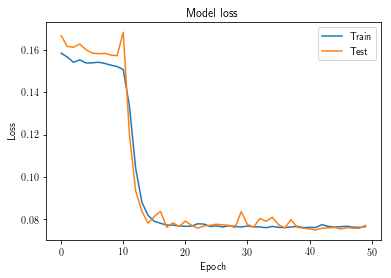

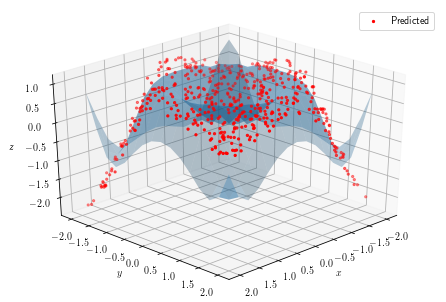

In [23]:
# Plot training & validation loss values
n = 500
x_predicted = np.zeros((n, 2))

x_predicted[:,0] = np.random.uniform(-2., 2., n)
x_predicted[:,1] = np.random.uniform(-2., 2., n)
X, Y = np.meshgrid(np.arange(-2.,2.,0.25), np.arange(-2.,2.,0.25))

y_expected = np.sin(X**2 + Y**2)
y_predicted = model.predict(x_predicted)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, c='red', marker='.', label = 'Predicted')
ax.plot_surface(X, Y, y_expected, alpha = 0.3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(30, 45)

plt.legend()
plt.show()

Per cercare di migliorare i risultati ho aggiunto un layer che utlizza come attivatore *sigmoid* e ho aumentato il numero di neuroni. Con questa scelta di parametri tuttavia viene ben fittata la superficie ma appena ci si allontana dall'intorno del training la NN non è in grado di prevedere l'andamento della funzione.